<a href="https://colab.research.google.com/github/LaetitiaVerel/Odyssey-Quests/blob/master/Matplolib%20for%20beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]


# You have now a DataFrame with weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :

## ScatterPlot with 2 variables, title and legend

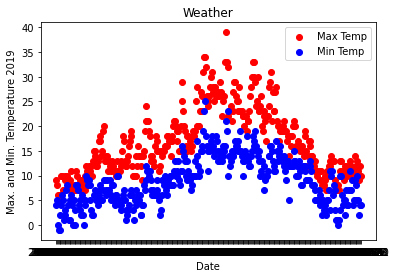

In [ ]:
# First of all, you have to create a scatterplot with MAX (in red) and MIN (in blue) Temperatures on the same graph
# X-axis stay "DATE" for the both values
# You have to add title and legend

import matplotlib.pyplot as plt
import pandas as pd

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

plt.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red', label = 'Max Temp')
plt.scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue', label = 'Min Temp') #You have to complete this code

plt.title('Weather')
plt.xlabel('Date')
plt.ylabel('Max. and Min. Temperature 2019')
plt.legend()

plt.show()


## 2 charts on the same figure

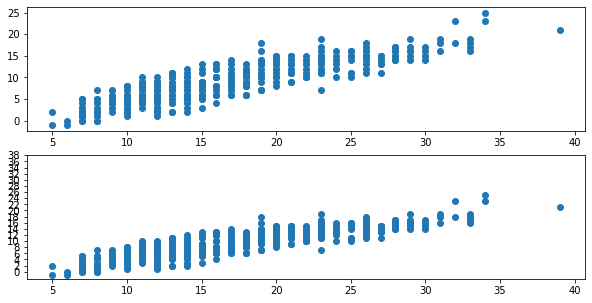

In [ ]:
# Now, complete this code to have MAX and MIN Temperature in 2 charts, MAX on the left side and MIN on the right side 
# The X axis have to be the date of the year
# Each graph must have a title, a legend for the colors, and of course, readable axis (ticks)

fig, ax = plt.subplots(figsize = (10,5)) # fig is the global figure, which contains 2 subplots here (ax1 and ax2)
ax1 = plt.subplot(211) # 211 ? What does it mean ? 2 for 2 lines, 1 for 1 column and 1 for the first chart, you can change it
ax1.scatter(y = df_weather['MIN_TEMPERATURE_C'], x = df_weather['MAX_TEMPERATURE_C'])
ax2 = plt.subplot(212)
ax2.scatter(y = df_weather['MIN_TEMPERATURE_C'], x = df_weather['MAX_TEMPERATURE_C'])
ax2.yaxis.set_ticks(range(0,40,2)) #Hey, look at this ! I just modified the scale and the ticks with only one line !
plt.show()

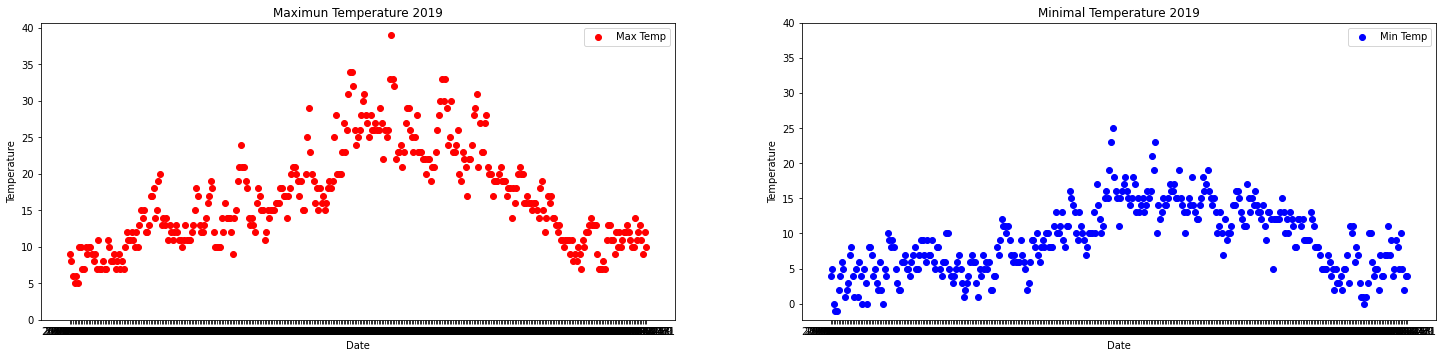

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 3)) # fig is the global figure, which contains 2 subplots here (ax1 and ax2)
plt.gcf().subplots_adjust(top = 1.5, hspace = 0.2)
ax[0] = plt.subplot(122) # 211 ? What does it mean ? 2 for 2 lines, 1 for 1 column and 1 for the first chart, you can change it
ax[0].scatter(y = df_weather['MIN_TEMPERATURE_C'], x = df_weather['DATE'], color = 'blue', label= 'Min Temp')
ax[0].yaxis.set_ticks(range(0, 45, 5))
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Temperature')
plt.title('Minimal Temperature 2019')

plt.legend()
ax[1] = plt.subplot(121)
ax[1].scatter(y = df_weather['MAX_TEMPERATURE_C'], x = df_weather['DATE'], color = 'red', label= 'Max Temp')
ax[1].yaxis.set_ticks(range(0, 45, 5)) #Hey, look at this ! I just modified the scale and the ticks with only one line !
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Temperature')
plt.title('Maximun Temperature 2019')
plt.legend()

plt.show()

## and 4 charts now !

In [ ]:
# Now, you have to show a figure with 4 subplots :
#     For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
#     For the top right one : a pie-chart with frequencies of opinions. Could you "explode" the "very good" part ?
#     For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
#     For the bottom right one : an histogram of MAX Temperature
# Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)


df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?

very bad            98
bad                 94
good                93
not good not bad    76
very good            4
Name: OPINION, dtype: int64

In [ ]:
count = df_weather['OPINION'].value_counts()
count

very bad            98
bad                 94
good                93
not good not bad    76
very good            4
Name: OPINION, dtype: int64

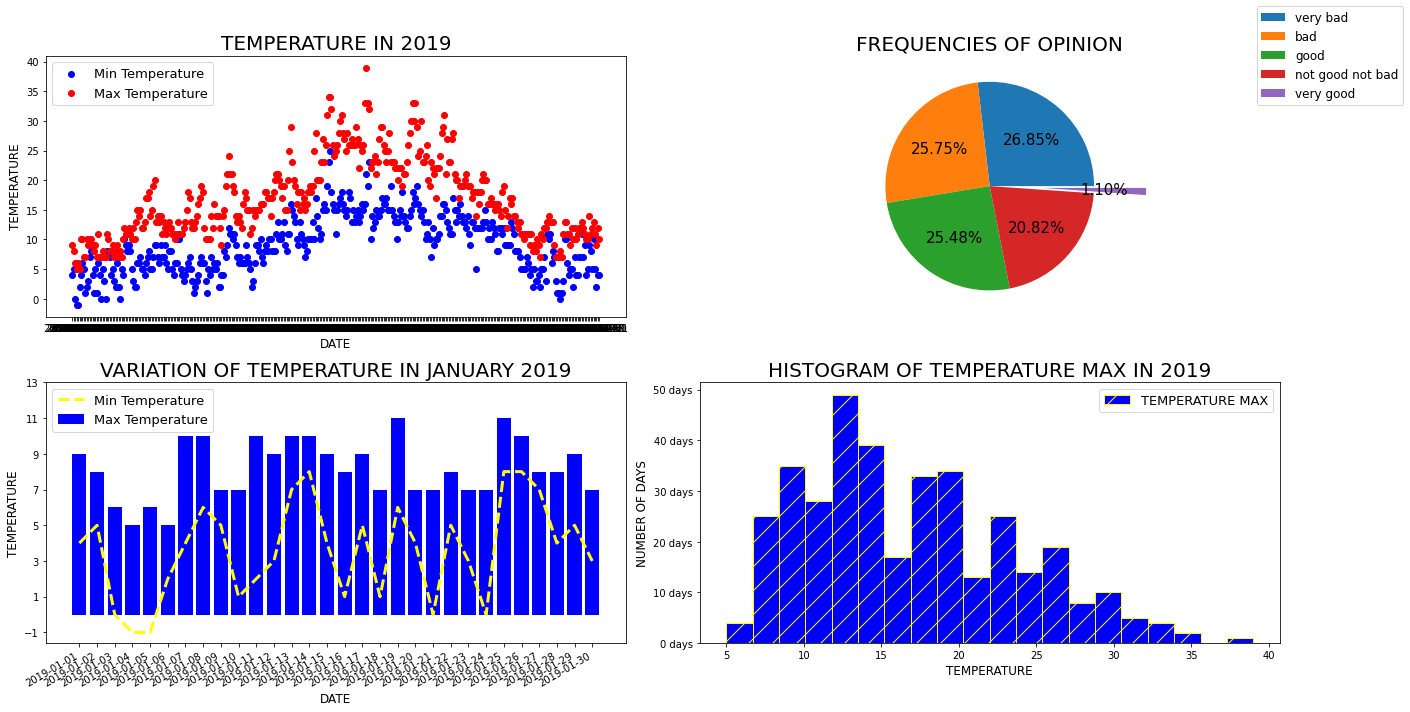

In [ ]:
from matplotlib.ticker import EngFormatter

fig, ax = plt.subplots(2,2, figsize = (20,10))

#Plot 1
ax[0][0].scatter(x = df_weather['DATE'], y = df_weather['MIN_TEMPERATURE_C'], label='Min Temperature', color='blue')
ax[0][0].scatter(x = df_weather['DATE'], y = df_weather['MAX_TEMPERATURE_C'], label='Max Temperature', color='red')
ax[0][0].set_xlabel("DATE", fontsize=12)
ax[0][0].set_ylabel("TEMPERATURE", fontsize=12)
ax[0][0].set_title("TEMPERATURE IN 2019", fontsize=20)
ax[0][0].legend(loc='upper left', prop={'size': 13})

"""
import matplotlib
import matplotlib.pyplot as plt
x = [0,1,2]
y = [90,40,65]
labels = ['high', 'low', 37337]
plt.plot(x,y, 'r')
plt.xticks(x, labels, rotation='vertical')

"""

#Plot 2
ax[0][1].pie(count, autopct='%.2f%%', explode = (0, 0, 0, 0, 0.5), textprops={'fontsize': 15})
ax[0][1].legend(count.index, loc="center left", bbox_to_anchor=(1.5, 0, 0.5, 2),fontsize=12)
ax[0][1].set_title("FREQUENCIES OF OPINION",fontsize=20)

#Plot 3
january = df_weather[:30]
ax[1][0].bar(january['DATE'], january['MAX_TEMPERATURE_C'], color='blue', label='Max Temperature')
ax[1][0].set_title("VARIATION OF TEMPERATURE IN JANUARY 2019", fontsize=20)
ax[1][0].plot(january['DATE'], january['MIN_TEMPERATURE_C'], color='yellow', label='Min Temperature', linewidth=3, linestyle="--")
ax[1][0].set_xlabel("DATE", fontsize=12)
ax[1][0].set_ylabel("TEMPERATURE", fontsize=12)
ax[1][0].set_yticks(range(-1, 15, 2))
ax[1][0].legend(loc='upper left', prop={'size': 13})
plt.setp(ax[1][0].get_xticklabels(), rotation=30, horizontalalignment='right')

#Plot 4
ax[1][1].yaxis.set_major_formatter(EngFormatter(unit=u"days"))

ax[1][1].hist(df_weather['MAX_TEMPERATURE_C'], color='blue', edgecolor = 'yellow', hatch = '/', label='TEMPERATURE MAX', 
              bins = 20)
ax[1][1].set_xlabel("TEMPERATURE", fontsize=12)
ax[1][1].set_ylabel("NUMBER OF DAYS", fontsize=12)
ax[1][1].set_title("HISTOGRAM OF TEMPERATURE MAX IN 2019", fontsize=20)
ax[1][1].legend(loc='upper right', prop={'size': 13})

fig.tight_layout()
plt.show()

## Last but not least

In [ ]:
# We would know if Opinion is a good indicator.
# Could you draw 1 scatterplot with :
#       DATE on X-axis
#       MAX Temperature on Y-axis
#       Colorize in green the good and very good points
#       Colorize in red the bad and very bad points
#       Colorize in yellow the not good not bad points
# Tips : index can help you to sort the date correctly
# The chart must have a title, a legend for the colors, and of course, readable axis (ticks)


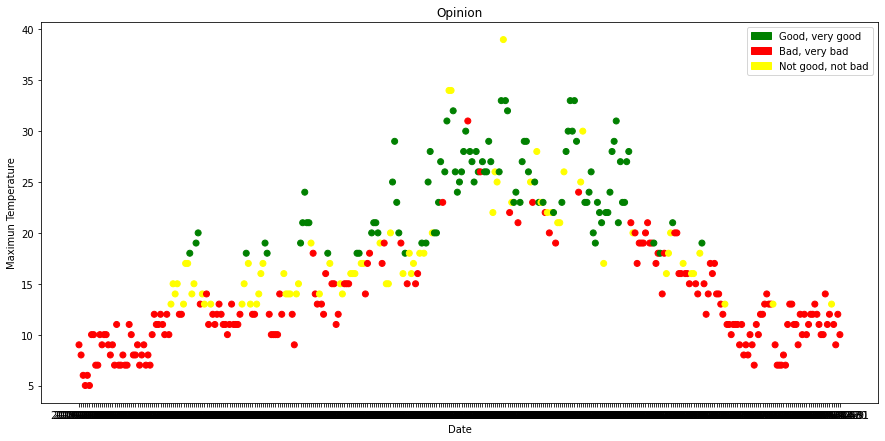

In [ ]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(15, 7))

patch_vert = mpatches.Patch(color='green', label='Good, very good')
patch_rouge = mpatches.Patch(color='red', label='Bad, very bad')
patch_jaune = mpatches.Patch(color='yellow', label='Not good, not bad')

colors = {'very bad': 'red', 'bad': 'red', 'not good not bad': 'yellow', 'good' : 'green', 'very good':'green'}

ax.scatter( x = df_weather['DATE'], y = df_weather['MAX_TEMPERATURE_C'], c= df_weather['OPINION'].apply(lambda x: colors[x]))
plt.xlabel('Date')
plt.ylabel('Maximun Temperature')
plt.legend(handles=[patch_vert, patch_rouge, patch_jaune])
plt.title("Opinion")

plt.show()